<a href="https://colab.research.google.com/github/pingstech/ZeroToHero-ML/blob/main/06_MachineLearning_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
 
file_id = "1V15H9OA_Aj4dU6y3BMRdKcNDHUMzvSe2"
 
downloaded = drive.CreateFile({'id': file_id})
 
downloaded.GetContentFile("linear_regression_dataset.csv")

In [ ]:
import pandas as pd
tempData = pd.read_csv("linear_regression_dataset.csv", sep=";")
tempData

,Experience,Sallary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


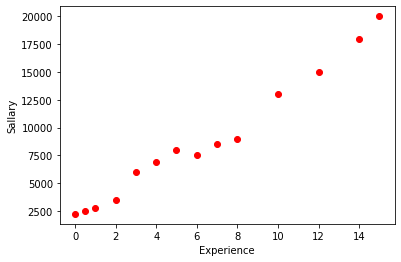

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(tempData.Experience,tempData.Sallary,color="red")
plt.xlabel("Experience")
plt.ylabel("Sallary")
plt.show()

In [ ]:
#Line fit ya da Lineer Regression y=b0+b1*x    x=deneyim, y=maaş, b0=constant((bias yani sabit)x eksenini kesiği nokta), b1=coefficient(katsayı / eğim)
#Alt kısımdaki resimde anlatımı mevcut

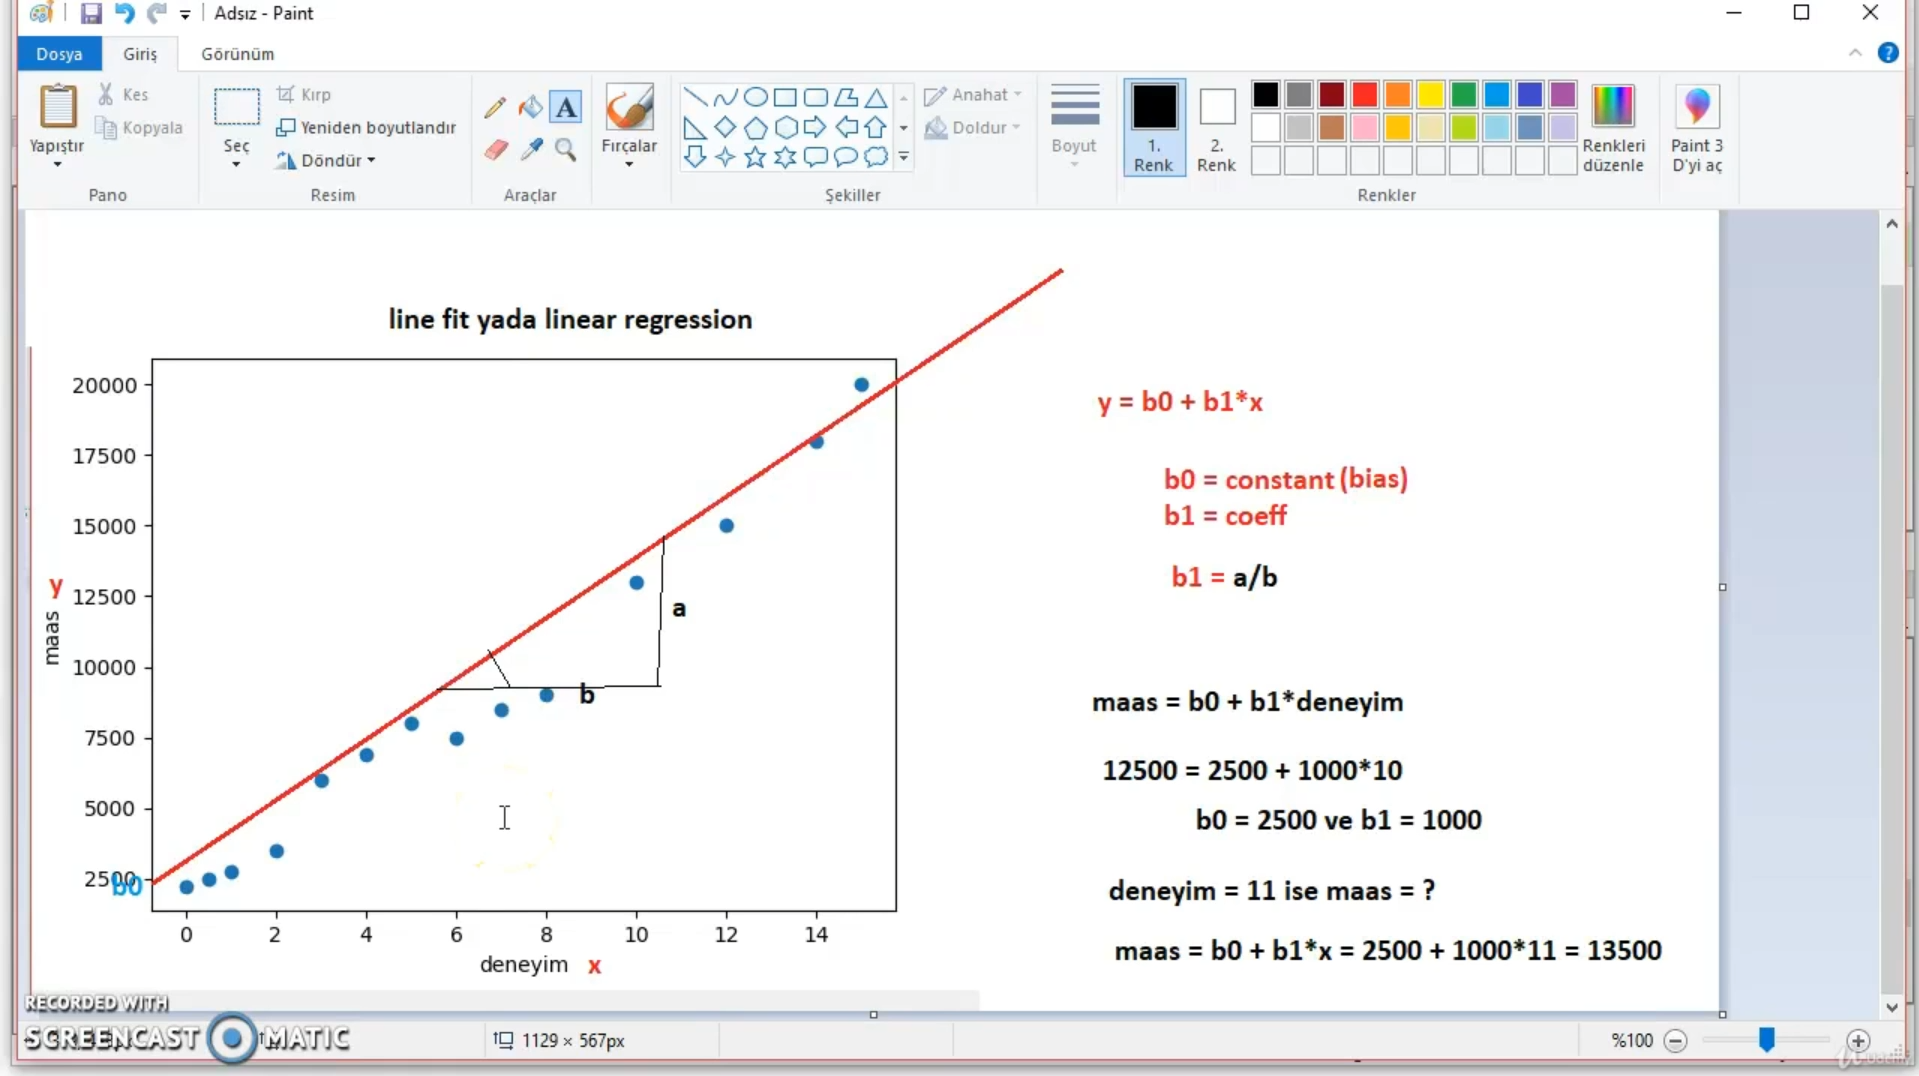

In [ ]:
#Doğru tüm noktalara en yakın bir noktadan geçecek.
#Bu doğrunun, noktaya yakınlığına "residual" denir.
#residual=y-y_head     y_head=tahmin edilen değer, y=nokta
#residual'ların kareleri alınacak(karelerini alıyoruz çünkü hem negatif, hem pozitif değeler çıkacak ve bundan dolayı hata azalıyor gözüksede azalmamış olurdu)
#sonra tum residual'lar toplanır => MSE=sum(residual**2)/n,   n=sample(örnek sayısı)
#MSE= Mean Squared Error demek(ortalama karesel hata)
#Öyle bir b0 ve b1 değerleri seçeceğiz ki min(MSE) elde edeceğiz
#Alt kısımdaki resimde anlatımı mevcut

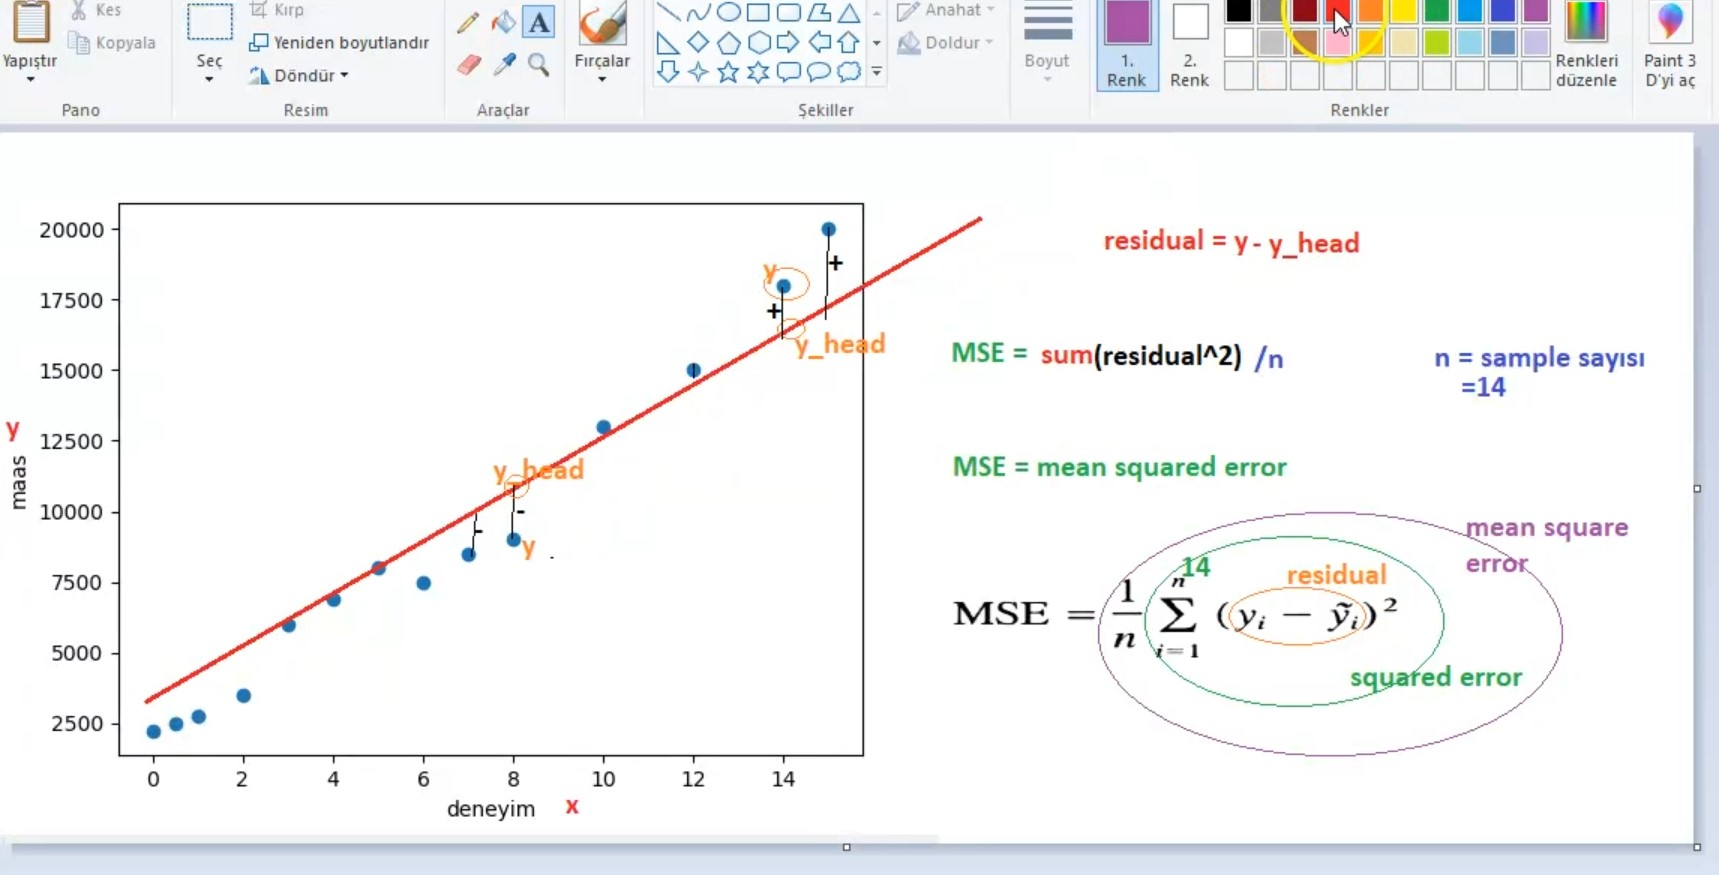

In [ ]:
from sklearn.linear_model import LinearRegression
#Linear regression model
linear_reg=LinearRegression()   #Linear regression'ı "lineer_reg" isimli değişkene kaydettik
tempX=tempData.Experience.values.reshape(-1,1)  
tempY=tempData.Sallary.values.reshape(-1,1)
#Burada numpy array yapmaya çalışıyoruz fakat 14x1 olan matrisi "tempX.shape" ile baktığımızda çıktı "(14,)" şeklinde olur. 
# Sklearn bu veriyi kabul etmediği için ".reshape(-1,1)"i sonuna ekliyoruz
print(tempX)
print("-----------------------")
print(tempY)

[[ 0.5]
 [ 0. ]
 [ 1. ]
 [ 5. ]
 [ 8. ]
 [ 4. ]
 [15. ]
 [ 7. ]
 [ 3. ]
 [ 2. ]
 [12. ]
 [10. ]
 [14. ]
 [ 6. ]]
-----------------------
[[ 2500]
 [ 2250]
 [ 2750]
 [ 8000]
 [ 9000]
 [ 6900]
 [20000]
 [ 8500]
 [ 6000]
 [ 3500]
 [15000]
 [13000]
 [18000]
 [ 7500]]


In [ ]:
#Lineer Regression modelini fit etti
linear_reg.fit(tempX,tempY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Prediction
b0=linear_reg.predict([[0]]) # x=0 olduğu zaman y=b0 olduğundan dolayı bu eşitliği sağladık
print("b0: ",b0)

b0:  [[1663.89519747]]


In [ ]:
#b0'ı bu şekilde de bulabiliriz
b0_=linear_reg.intercept_ # y eksenini kesiği nokta(intercept)
print("b0_: ",b0_)

b0_:  [1663.89519747]


In [ ]:
# coefficient=b1 olduğu için direkt fonksiyonu kullanarak b1 değerini bulduk
b1=linear_reg.coef_
print("b1: ",b1)  #eğim(slope)

b1:  [[1138.34819698]]


In [ ]:
#Sallary=b0+b1*Experience =>  Sallary=1663.89 + (1138.34)*Experience

newSallary=1663.89 + (1138.34)*11
print("New Sallary: ",newSallary)

New Sallary:  14185.63


In [ ]:
#Burada da aynı işlem yapılmış oldu aslında
print(linear_reg.predict([[11]]))

[[14185.72536421]]


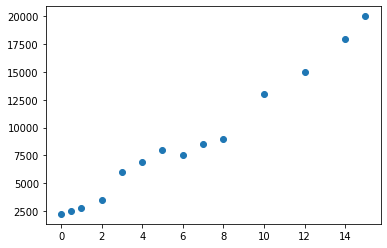

In [ ]:
import numpy as np

#Visualize Line
tempArr=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1) #Burada ".reshape(-1,1)"i yine sklearnden dolayı kullandık
plt.scatter(tempX,tempY)
plt.show()

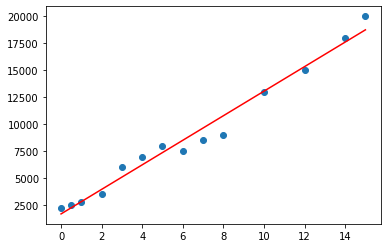

In [ ]:
y_head=linear_reg.predict(tempArr) #Yani tempArr için deki değerler için tahmin edilen değerleri y_head'in içine atıyoruz
plt.plot(tempArr,y_head,color="red") 
plt.scatter(tempX,tempY)
plt.show()

In [ ]:
print("36 sene çalışacak birisinin maaşı:{}TL olur".format(int(linear_reg.predict([[36]]))))

36 sene çalışacak birisinin maaşı:42644TL olur


In [ ]:
#----------------------------------KENDİ BAŞIMA DENEMELER----------------------------------

In [ ]:
#----------------------------------BAŞLANGIÇ & GELİŞME----------------------------------
tempX2=np.array([float(each) for each in range(10,36,2)]).reshape(-1,1)
tempY2=np.array([500,522,578,662,550,680,713,744,788,816,790,920,1030]).reshape(-1,1)
linear_reg2=LinearRegression()
linear_reg2.fit(tempX2,tempY2)
#RASTGELE DENEYİM DEĞERLERİ VE MAAŞ DEĞERLERİ OLUŞTURDUK
#SONRA LİNEER REGRASYON UYGULAYIP, FİT ETTİK

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#----------------------------------FİNAL----------------------------------
tempArr2=np.array([float(each) for each in range(10,36,2)]).reshape(-1,1)
prdictY=linear_reg2.predict(tempArr2)
#BİR TANE NUMPY ARRAY OLUŞTURDUK, BU DEĞERLER DENEYİM İÇİN VE BU DEĞERLİ KULLANARAK MAAŞ TAHMİN EDECEĞİZ
#DAHA SONRA BU DEĞERLERE KARŞILIK GELEN DEĞERLERİ ".predict()" İLE TAHMİN ETTİRDİK

<function matplotlib.pyplot.show>

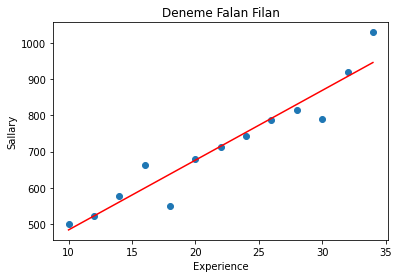

In [ ]:
#----------------------------------GÖRSELLEŞTİRME----------------------------------
plt.scatter(tempX2,tempY2)
plt.plot(tempArr2,prdictY,color="red")
plt.title("Deneme Falan Filan")
plt.xlabel("Experience")
plt.ylabel("Sallary")
plt.show